# Project 01

**Submitted by: Diego Sol**

CSCE 636-600: Deep Learning

Professor: Dr. Anxiao Jiang

----------------

**This project is on image classification for noisy MNIST dataset. When we add noise to images in the MNIST dataset, the digits in the images become more and more difficult for human to recognize. Your task is to train a good hand-written-digit recognition classifier for the noisy images.**

# Initialization

**This section includes mounting the session to Google Drive, importing necessary packages to run the file, and downloading the training datasets.**

Mount Google Drive to this notebook to easily access training data

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import packages

In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from IPython.core.pylabtools import figsize

Download training images and labels

In [14]:
train_images = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_images', 'rb'))
train_labels = pickle.load(open('/content/drive/MyDrive/Colab Notebooks/CSCE_636_Project_1/636_project1_train_labels', 'rb'))

# Convnet Model

**This model consists of a simple convolutional neural network (CNN). Simple CNN models has been found to be the most effective at consistently attaining relatively high validation accuracies. These accuracies appear to max out at about 65% after 12 epochs.**

## Manipulating the data

Plot random images with labels to visualize the training data

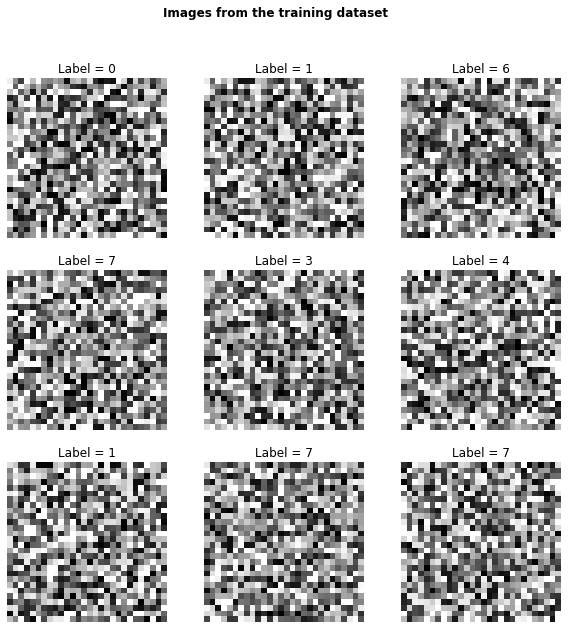

In [15]:
# create figure to randomly display training data
fig1, ax1 = plt.subplots(3,3,figsize=(10,10))
fig1.suptitle("Images from the training dataset", fontweight="bold")

for ii in range(9):
  # generate random number in training set
  n = np.random.choice(60000)

  # plot training images to subplot
  ax1 = plt.subplot(3, 3, ii + 1)
  ax1.set_title(f"Label = {train_labels[n]}")
  plt.imshow(train_images[n], cmap=plt.cm.binary)
  plt.axis('off')

plt.show()

## Creating the model

Create a simple convolutional neural network with 3 convolutional layers and 1 average pooling layer

In [16]:
inputs = keras.Input(shape=(28, 28, 1))

x = layers.Rescaling(1./255) (inputs)

x = layers.Conv2D(32, 3, activation="relu") (x)
x = layers.MaxPooling2D(pool_size=2) (x)
x = layers.Conv2D(64, 3, activation="relu") (x)
x = layers.Conv2D(128, 3, activation="relu") (x)

x = layers.Flatten() (x)
x = layers.Dropout(0.5) (x)

outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="rmsprop",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 28, 28, 1)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 128)         73856     
                                                           

Use callbacks to save the best model

In [17]:
callbacks_list = [
                  keras.callbacks.ModelCheckpoint(
                      filepath="project01_Sol.keras",
                      monitor="val_loss",
                      save_best_only=True
                  )]

Train the model

In [18]:
history = model.fit(train_images,
                    train_labels,
                    epochs=30,
                    validation_split=0.4,
                    batch_size=32,
                    verbose=1,
                    callbacks=callbacks_list)

Epoch 1/30
1125/1125 [==============================] - 6s 5ms/step - loss: 1.8135 - accuracy: 0.3548 - val_loss: 1.4478 - val_accuracy: 0.5045
Epoch 2/30
1125/1125 [==============================] - 5s 4ms/step - loss: 1.3035 - accuracy: 0.5584 - val_loss: 1.1793 - val_accuracy: 0.5957
Epoch 3/30
1125/1125 [==============================] - 5s 4ms/step - loss: 1.1764 - accuracy: 0.6023 - val_loss: 1.1023 - val_accuracy: 0.6240
Epoch 4/30
1125/1125 [==============================] - 5s 4ms/step - loss: 1.1214 - accuracy: 0.6220 - val_loss: 1.0860 - val_accuracy: 0.6416
Epoch 5/30
1125/1125 [==============================] - 5s 4ms/step - loss: 1.0902 - accuracy: 0.6301 - val_loss: 1.0548 - val_accuracy: 0.6402
Epoch 6/30
1125/1125 [==============================] - 5s 4ms/step - loss: 1.0641 - accuracy: 0.6401 - val_loss: 1.0948 - val_accuracy: 0.6334
Epoch 7/30
1125/1125 [==============================] - 5s 4ms/step - loss: 1.0529 - accuracy: 0.6429 - val_loss: 1.0519 - val_accuracy:

## Training perfomance

In [19]:
# history data
history_dict = history.history

# training metric history
train_loss_values = history_dict["loss"]
train_acc_values = history_dict["accuracy"]

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

Plot training and validation loss

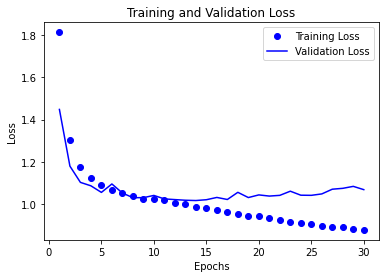

In [20]:
# create figure for training and validation loss
fig2, ax2 = plt.subplots()

# plot
ax2.plot(epochs, train_loss_values, "bo", label="Training Loss")
ax2.plot(epochs, val_loss_values, "b", label="Validation Loss")
ax2.set_title("Training and Validation Loss")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend()
plt.show()

Plot training and validation accuracy

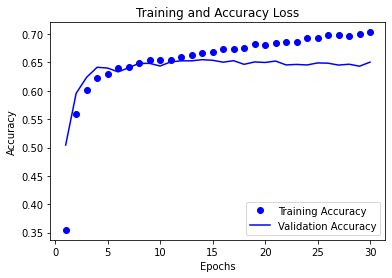

In [21]:
# create figure for training data
fig3, ax3 = plt.subplots()

# plot
ax3.plot(epochs, train_acc_values, "bo", label="Training Accuracy")
ax3.plot(epochs, val_acc_values, "b", label="Validation Accuracy")
ax3.set_title("Training and Accuracy Loss")
ax3.set_xlabel("Epochs")
ax3.set_ylabel("Accuracy")
ax3.legend()
plt.show()

Print best version of the model that was saved

In [22]:
# history data
history_dict = history.history

# validation metric history
val_loss_values = history_dict["val_loss"]
val_acc_values = history_dict["val_accuracy"]

# minimum loss and index
min_loss, idx = min((val, idx) for (idx, val) in enumerate(val_loss_values))

# maximum accuracy
max_acc = val_acc_values[idx]

# print values
print(f'Epoch:          {idx + 1}')
print(f'Min loss:       {min_loss}')
print(f'Max accuracy:   {max_acc}')

Epoch:          14
Min loss:       1.0162937641143799
Max accuracy:   0.6549583077430725
